In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load the TB dataset
train_dir = "C:/Users/Rithanya/Desktop/TB dataset/training"
validation_dir = "C:/Users/Rithanya/Desktop/TB dataset/val"
test_dir = "C:/Users/Rithanya/Desktop/TB dataset/testing"

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True)

In [4]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 4200 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 40 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 840 images belonging to 2 classes.


In [9]:
# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
132/132 [==============================] - 515s 4s/step - loss: 0.3262 - accuracy: 0.8921 - val_loss: 1.1227 - val_accuracy: 0.6000
Epoch 2/10
132/132 [==============================] - 386s 3s/step - loss: 0.1674 - accuracy: 0.9314 - val_loss: 1.0801 - val_accuracy: 0.6000
Epoch 3/10
132/132 [==============================] - 380s 3s/step - loss: 0.1450 - accuracy: 0.9381 - val_loss: 0.6670 - val_accuracy: 0.7000
Epoch 4/10
132/132 [==============================] - 386s 3s/step - loss: 0.1969 - accuracy: 0.9212 - val_loss: 0.5388 - val_accuracy: 0.8250
Epoch 5/10
132/132 [==============================] - 7570s 58s/step - loss: 0.1674 - accuracy: 0.9345 - val_loss: 0.7789 - val_accuracy: 0.7000
Epoch 6/10
132/132 [==============================] - 496s 4s/step - loss: 0.1755 - accuracy: 0.9357 - val_loss: 0.4188 - val_accuracy: 0.8250
Epoch 7/10
132/132 [==============================] - 448s 3s/step - loss: 0.1446 - accuracy: 0.9500 - val_loss: 0.2751 - val_accuracy: 0.87

In [12]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epochs_range = range(10)

Text(0.5, 1.0, 'Training and Validation Accuracy')

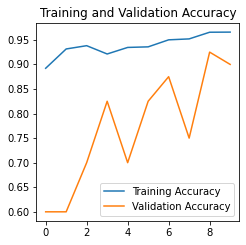

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#We train the model using the training data and check its performance on both 
#the training and validation sets (evaluation metric is accuracy). 
#The training accuracy comes out to be 95% whereas the validation accuracy is 62%.

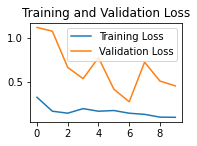

In [16]:
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#The training loss indicates how well the model is fitting the training data, 
#While the validation loss indicates how well the model fits new data

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test accuracy:", test_acc)

27/27 - 50s - loss: 0.1971 - accuracy: 0.9405 - 50s/epoch - 2s/step
Test accuracy: 0.9404761791229248


In [18]:
import pickle
from tensorflow import keras

In [19]:
model.save('C:/Users/Rithanya/Desktop/TB check')

INFO:tensorflow:Assets written to: C:/Users/Rithanya/Desktop/TB check\assets


INFO:tensorflow:Assets written to: C:/Users/Rithanya/Desktop/TB check\assets


In [26]:
#PREDICTION OF SINGLE IMAGE
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt                                         
import cv2

In [28]:
# Load the trained model
model = keras.models.load_model('C:/Users/Rithanya/Desktop/TB check')

In [29]:
# Load a single test image
img_path = "C:/Users/Rithanya/Desktop/Test images/nor img2.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

In [30]:
# Preprocess the image
img = img / 255.0
img = np.expand_dims(img, axis=0)

In [31]:
# Predict the class probabilities
probs = model.predict(img)

1/1 [==============================] - 0s 316ms/step


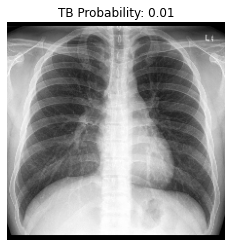

In [32]:
# Visualize the image and the predicted probabilities
plt.imshow(img[0])
plt.title(f'TB Probability: {probs[0][0]:.2f}')
plt.axis('off')
plt.show()